In [2]:
import pandas as pd



In [4]:
df=pd.read_csv("data/train.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [6]:
df.shape

(193573, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [10]:
df.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [12]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [13]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [70]:
df2=df.sample(n=50000)
df2.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
38708,38708,0.36,Ideal,D,SI1,61.8,56.0,4.54,4.58,2.82,626
143283,143283,0.26,Ideal,G,VS1,61.7,56.0,4.08,4.10,2.53,432
13932,13932,0.74,Ideal,J,VS1,61.6,56.0,5.79,5.85,3.59,9870
109165,109165,1.05,Premium,H,SI1,62.8,57.0,6.47,6.49,4.07,4707
17556,17556,0.32,Very Good,G,VS2,63.3,56.0,4.36,4.38,2.77,561


In [71]:
df2=df2.drop(labels=['id'],axis=1)
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
38708,0.36,Ideal,D,SI1,61.8,56.0,4.54,4.58,2.82,626
143283,0.26,Ideal,G,VS1,61.7,56.0,4.08,4.10,2.53,432
13932,0.74,Ideal,J,VS1,61.6,56.0,5.79,5.85,3.59,9870
109165,1.05,Premium,H,SI1,62.8,57.0,6.47,6.49,4.07,4707
17556,0.32,Very Good,G,VS2,63.3,56.0,4.36,4.38,2.77,561


In [72]:
df2.duplicated().sum()

0

In [73]:
numerical_columns=df2.columns[df2.dtypes!='object']
categorical_columns=df2.columns[df2.dtypes=="object"]
print("numerical columns :" ,numerical_columns)
print("categorical_columns :",categorical_columns)


numerical columns : Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
categorical_columns : Index(['cut', 'color', 'clarity'], dtype='object')


In [74]:
df2[numerical_columns].describe()

,carat,depth,table,x,y,z,price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.790622,61.823878,57.233118,5.716357,5.721165,3.534866,3965.211000
std,0.460926,1.079452,1.925814,1.105812,1.098752,0.683986,4017.088096
min,0.200000,52.700000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.710000,4.720000,2.910000,957.000000
50%,0.700000,61.900000,57.000000,5.710000,5.720000,3.530000,2418.500000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5397.000000
max,3.040000,69.600000,70.000000,9.460000,9.360000,5.600000,18818.000000


In [75]:
df2[categorical_columns].describe()

,cut,color,clarity
count,50000,50000,50000
unique,5,7,8
top,Ideal,G,SI1
freq,23898,11586,13581


In [76]:
df2["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [77]:
df2["color"].unique()

array(['D', 'G', 'J', 'H', 'E', 'F', 'I'], dtype=object)

In [78]:
df2["clarity"].unique()

array(['SI1', 'VS1', 'VS2', 'VVS1', 'VVS2', 'SI2', 'IF', 'I1'],
      dtype=object)

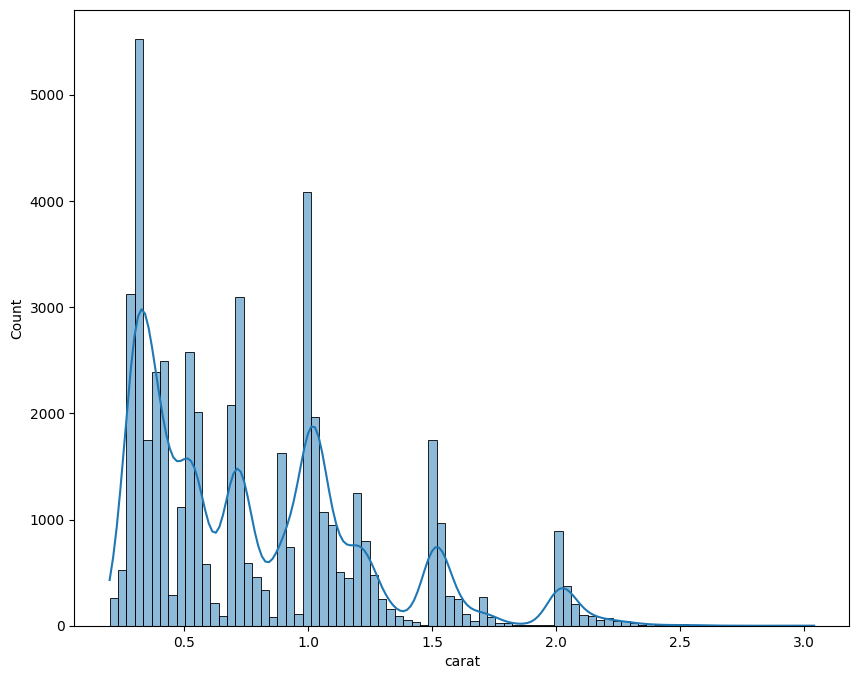

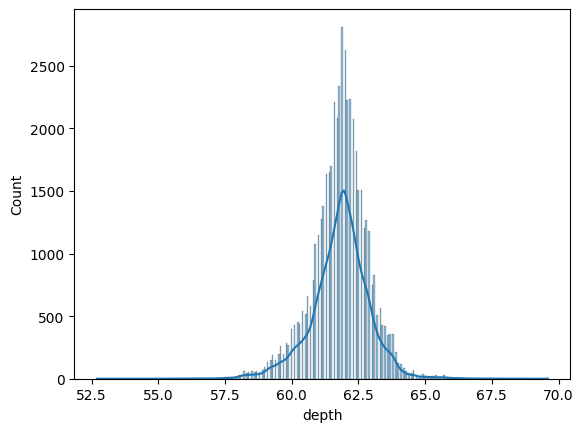

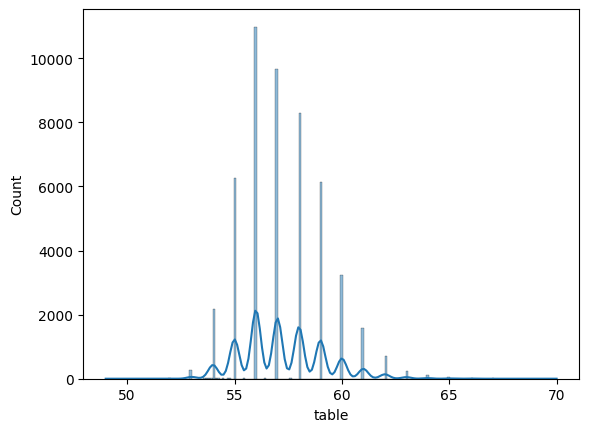

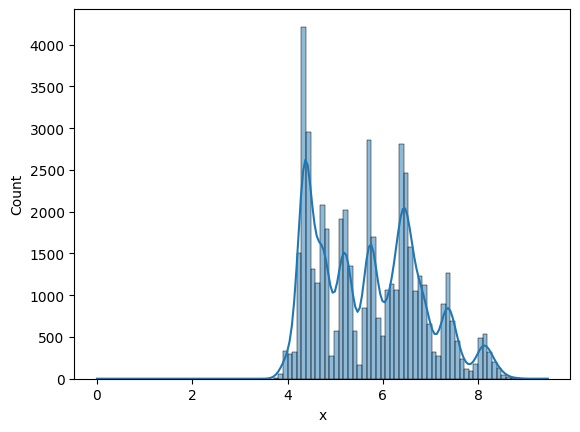

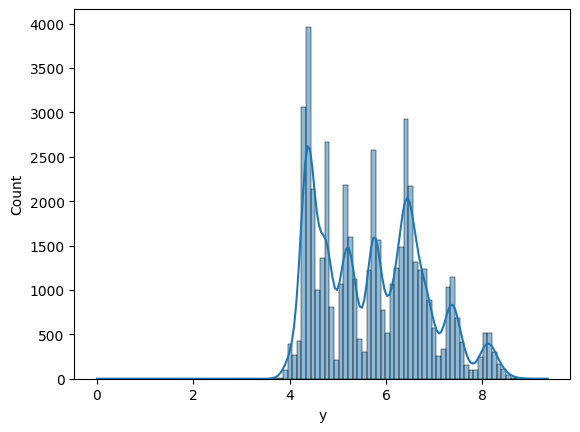

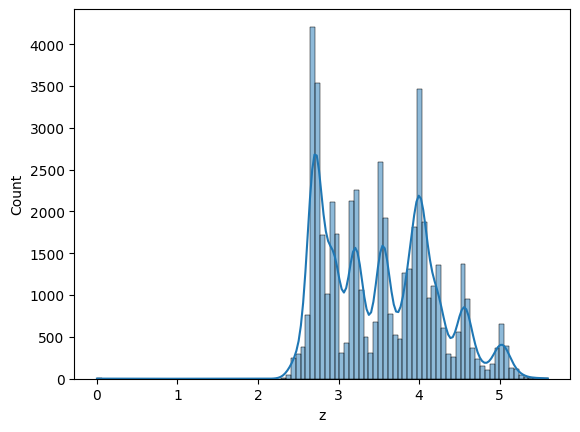

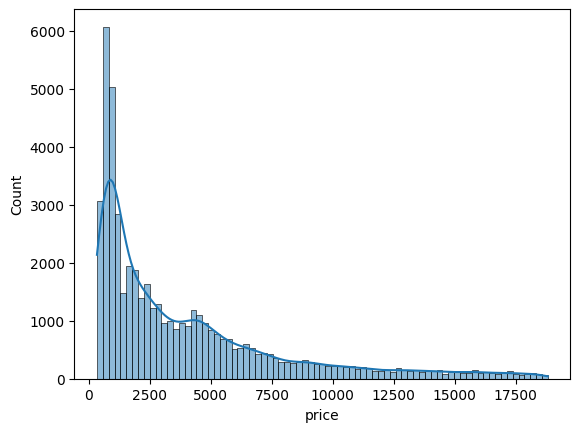

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
x=0
for i in numerical_columns:
    sns.histplot(data=df2,x=i,kde=True)
    print("\n")
    plt.show()
    


<Axes: >

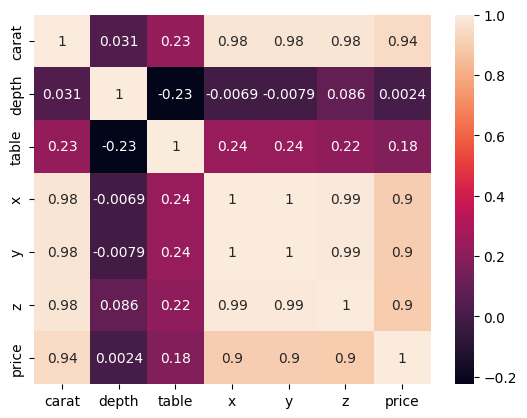

In [80]:

sns.heatmap(df2[numerical_columns].corr(),annot=True)

In [67]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}



In [81]:
df2["cut"]=df2["cut"].map(cut_map)
df2["clarity"]=df2["clarity"].map(clarity_map)
df2["color"]=df2["color"].map(color_map)

In [82]:
df2.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
38708,0.36,5,1,3,61.8,56.0,4.54,4.58,2.82,626
143283,0.26,5,4,5,61.7,56.0,4.08,4.10,2.53,432
13932,0.74,5,7,5,61.6,56.0,5.79,5.85,3.59,9870
109165,1.05,4,5,3,62.8,57.0,6.47,6.49,4.07,4707
17556,0.32,3,4,4,63.3,56.0,4.36,4.38,2.77,561


In [83]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [84]:
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

In [88]:
Y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681


In [89]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [92]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [90]:
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [93]:
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
    ('scaler',StandardScaler())
    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])


In [94]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

In [95]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [96]:
X_train.head()


,num_pipeline__id,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,1.274919,-0.975439,-0.849607,-0.121531,-1.042757,-1.080970,-1.123150,0.874076,1.528722,1.352731
1,-1.102907,0.235195,1.833637,-0.121531,0.318447,0.279859,0.485354,-2.144558,-0.935071,-0.646786
2,-0.997613,0.494617,0.815855,0.399800,0.570855,0.606458,0.673737,-0.132136,0.296826,0.686225
3,-1.173764,-1.018676,0.260701,0.921131,-1.214034,-1.244270,-1.195605,-0.132136,0.296826,0.019720
4,-0.914812,-0.953821,-0.664555,-0.642862,-1.069801,-1.044681,-1.094168,0.874076,2.144670,1.352731


In [97]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [98]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [99]:
regression.coef_

array([[-4.49143681e-02,  6.43365918e+03, -1.32758240e+02,
        -7.04288742e+01, -1.72031317e+03, -4.99289729e+02,
        -6.33921992e+01,  7.24455152e+01, -4.60416107e+02,
         6.50764277e+02]])

In [100]:
regression.intercept_


array([3970.76628955])

In [101]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square


In [102]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 1013.904802565844
MAE: 674.0257224619529
R2 score 93.68908132630604


Lasso
Model Training Performance
RMSE: 1013.8784227049385
MAE: 675.0716918421082
R2 score 93.68940971806553


Ridge
Model Training Performance
RMSE: 1013.906020909583
MAE: 674.0557936094827
R2 score 93.6890661594524


Elasticnet
Model Training Performance
RMSE: 1533.4194703386765
MAE: 1060.742542700526
R2 score 85.56488759855306


